In [1]:
import pandas as pd
import math
import numpy as np
import csv

In [2]:
def magnitude(user_id):
    x2 = user_id['xAxis'] * user_id['xAxis']
    y2 = user_id['yAxis'] * user_id['yAxis']
    z2 = user_id['zAxis'] * user_id['zAxis']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m
    

In [3]:
def window(axis,dx=500):
    start = 0
    size = axis.count()

    while (start < size):
        end = start + dx
        yield start,end
        start = start+int (dx/2)

In [4]:
def window_summary(axis, start, end):
    return [
        axis[start:end],
    ]

In [5]:
def features(user_id):
    for (start, end) in window(user_id['timestamp']):
        features = []
        for axis in ['xAxis', 'yAxis', 'zAxis', 'magnitude']:
            features += window_summary(user_id[axis], start, end)
        yield features     

In [6]:
def calc_magnitudes():
    for i in range (1,5):
        user_list[i-1]['magnitude'] = magnitude(user_list[i-1])

In [7]:
COLUMNS = ['timestamp', 'xAxis', 'yAxis', 'zAxis']
user_list = []
titles_list=[]
user_to_auth = 0

for i in range (1,6):
    file_path = 'Dataset/'+str(i)+'.csv'
    user_list.append((pd.read_csv(file_path,header=None,names=COLUMNS,nrows=500)))

#Add an additional axis of magnitude of the sensor data
calc_magnitudes() 

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset1.csv'

In [ ]:
def insert_row(userlist):
    for a,b,c,d,e in userlist.itertuples(index=False):
        yield a,b,c,d,e


In [ ]:
x=[]
sum=0
while sum!=1000:
    for a,b,c,d,e in insert_row(user_list[0]):
        x.append([i]+[a]+[b]+[c]+[d]+[e])
        sum+=1

    

In [ ]:
with open('Features.csv', 'w+') as out:
    rows = csv.writer(out)
    for i in range(0, len(user_list)):
        for a,b,c,d,e in user_list[i].itertuples(index=False):
            rows.writerow([i+1]+[a]+[b]+[c]+[d]+[e])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe=pd.read_csv('Features.csv',names=['person','timestamp','xAxis','yAxis','zAxis','magnitude'])

In [ ]:
dataframe.size

108000

In [ ]:
dataframe.head(15)

,person,timestamp,xAxis,yAxis,zAxis,magnitude
0,1,0.000000,0.69464,3.17350,7.5048,8.177753
1,1,0.030639,0.14982,3.48680,9.2755,9.910354
2,1,0.069763,-0.29965,1.94770,9.1120,9.322654
3,1,0.099823,-1.68890,1.41650,10.1200,10.357280
4,1,0.129820,-2.17930,0.95342,10.9240,11.179988
5,1,0.159790,-2.30180,0.23155,10.6510,10.899344
6,1,0.189820,-1.41650,1.18500,11.0730,11.225953
7,1,0.220400,-0.27241,2.22010,11.9860,12.192918
8,1,0.249760,-0.61292,2.22010,11.9860,12.205274
9,1,0.279720,1.33480,4.24950,11.4140,12.252320


In [ ]:
dataframe.dtypes

person         int64
timestamp    float64
xAxis        float64
yAxis        float64
zAxis        float64
magnitude    float64
dtype: object

In [ ]:
dataframe.describe()

,person,timestamp,xAxis,yAxis,zAxis,magnitude
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9.500000,15.764116,-0.911556,8.518917,1.130766,9.871581
std,5.188272,9.176989,3.085104,2.922635,3.195224,2.345476
min,1.000000,0.000000,-19.572000,-9.616000,-14.982000,0.628012
25%,5.000000,7.680275,-2.724100,6.851000,-0.762740,8.704328
50%,9.500000,15.730000,-0.762740,8.921300,0.381370,9.665126
75%,14.000000,23.650000,0.653780,9.997300,2.070300,10.924008
max,18.000000,35.180000,15.173000,19.572000,17.693000,23.157539


In [ ]:
x=dataframe.drop('person',axis=1)
x.corr()

,timestamp,xAxis,yAxis,zAxis,magnitude
timestamp,1.000000,-0.135255,0.170999,-0.283479,0.021324
xAxis,-0.135255,1.000000,-0.000343,0.052438,-0.142440
yAxis,0.170999,-0.000343,1.000000,-0.396120,0.584197
zAxis,-0.283479,0.052438,-0.396120,1.000000,0.083416
magnitude,0.021324,-0.142440,0.584197,0.083416,1.000000


In [ ]:
corr_matrix=x.corr()

<AxesSubplot:>

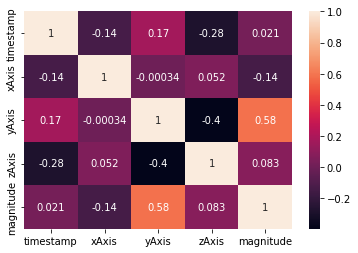

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
cov_matrix=x.cov()
cov_matrix

,timestamp,xAxis,yAxis,zAxis,magnitude
timestamp,84.217120,-3.829323,4.586376,-8.312335,0.458985
xAxis,-3.829323,9.517869,-0.003096,0.516916,-1.030702
yAxis,4.586376,-0.003096,8.541798,-3.699158,4.004651
zAxis,-8.312335,0.516916,-3.699158,10.209455,0.625148
magnitude,0.458985,-1.030702,4.004651,0.625148,5.501257


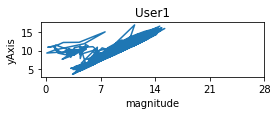

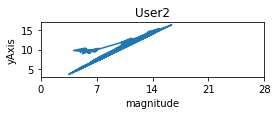

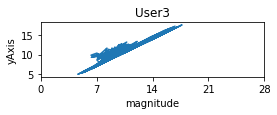

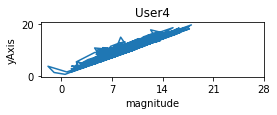

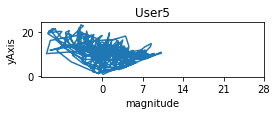

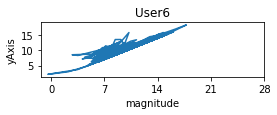

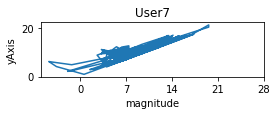

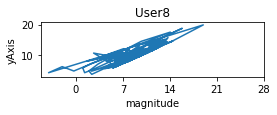

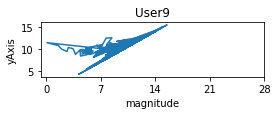

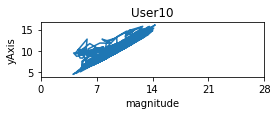

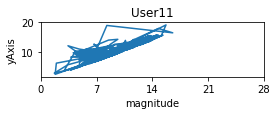

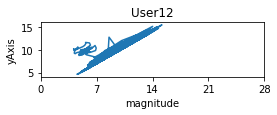

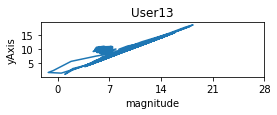

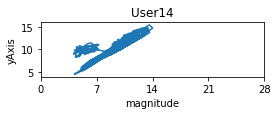

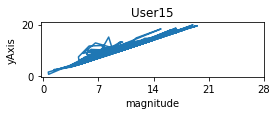

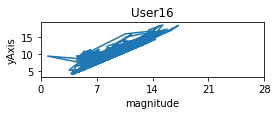

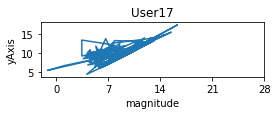

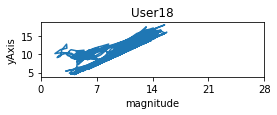

In [ ]:
for i in range(1,19):
    person_1 = dataframe[dataframe['person'] == i]
    x_axis_1 = person_1['magnitude']
    y_axis=person_1['yAxis']
    fig = plt.figure(figsize=(4, 1)) 
    plt.plot(y_axis,x_axis_1)
    plt.title('User'+str(i))
    plt.ylabel('yAxis')
    plt.xlabel('magnitude')
    plt.xticks(np.arange(0,30,7))
    plt.show()


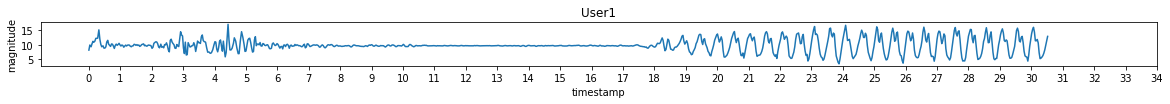

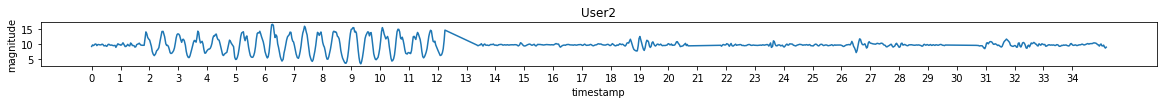

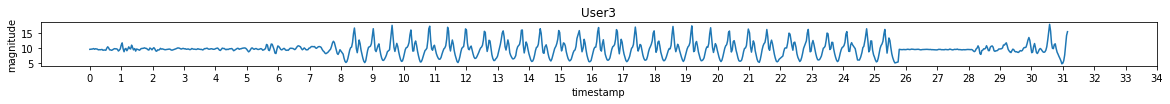

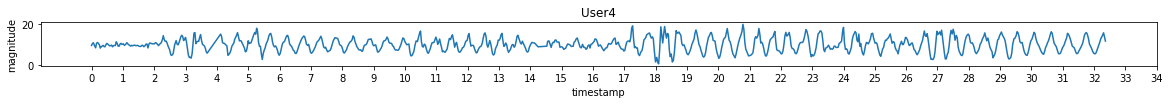

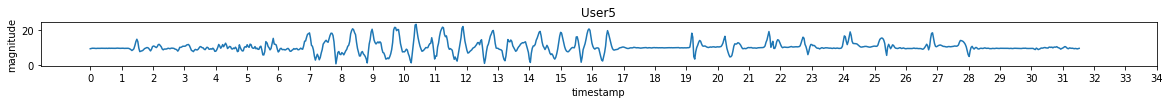

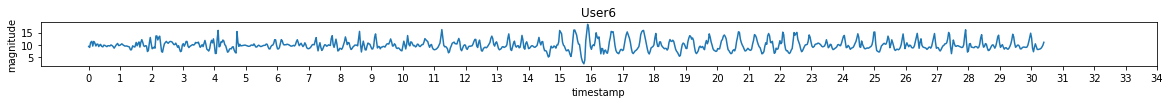

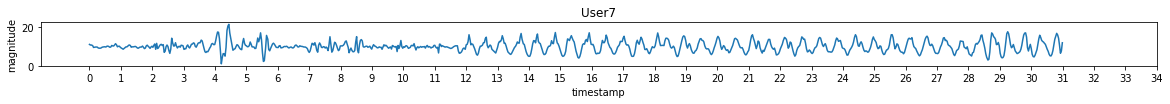

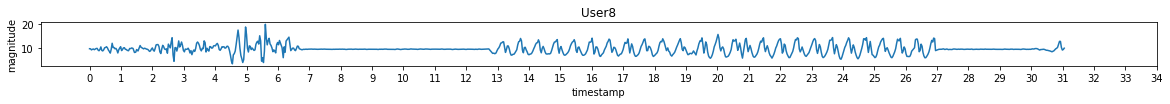

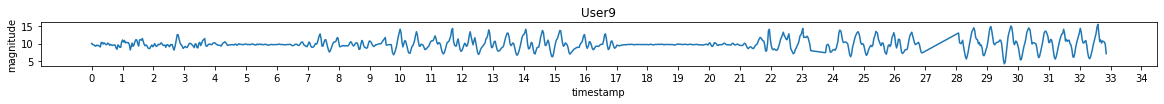

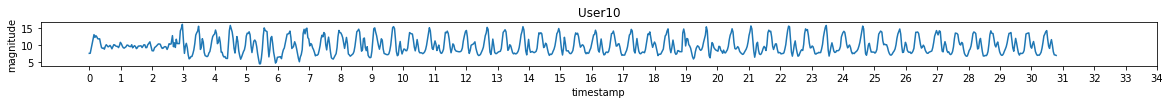

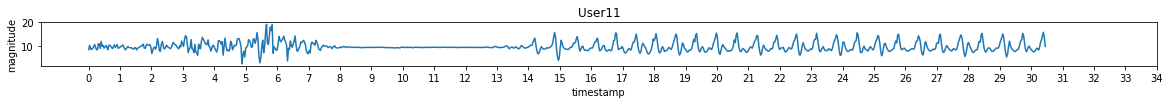

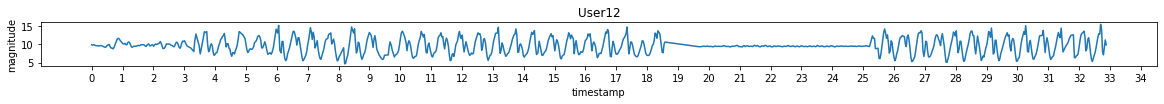

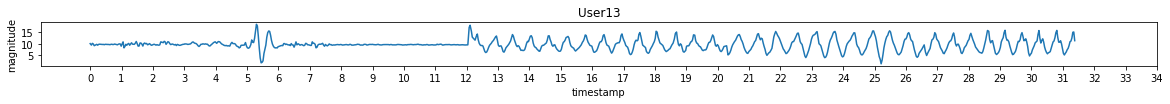

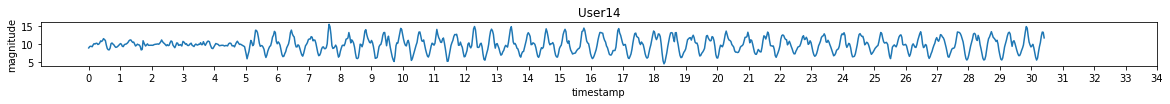

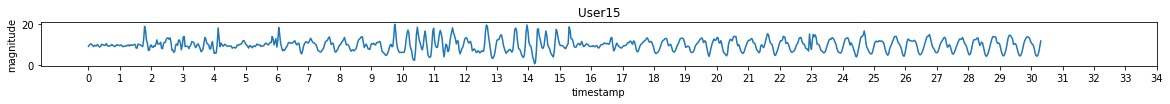

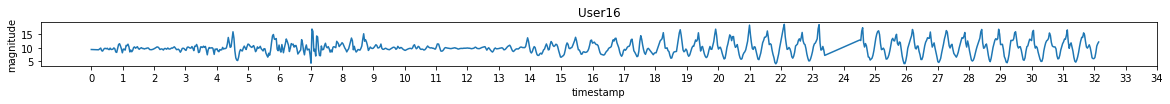

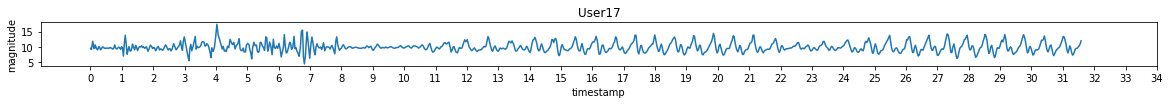

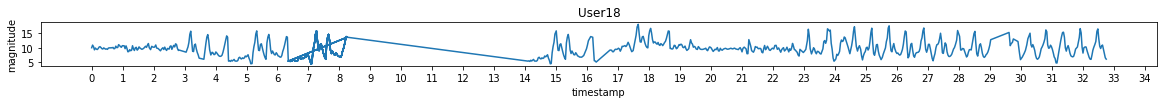

In [ ]:
for i in range(1,19):
    person_1 = dataframe[dataframe['person'] == i]
    y_axis = person_1['magnitude']
    x_axis=person_1['timestamp']
    fig = plt.figure(figsize=(20, 0.8)) 
    plt.plot(x_axis,y_axis)
    plt.title('User'+str(i))
    plt.ylabel('magnitude')
    plt.xlabel('timestamp')
    plt.xticks(np.arange(0,35,1))
    plt.show()